# MNIST with LeNet using Lightning

In [1]:
import torch
from pytorch_lightning import LightningDataModule, LightningModule, Trainer
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.tuner import Tuner
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchmetrics.functional import accuracy
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

torch.set_float32_matmul_precision("high")

In [2]:
from mnist_lenet import MNISTDataModel, LeNet5Model

In [3]:
ck_train_loss = ModelCheckpoint(
    monitor="train_loss", filename="model-{epoch:02d}-{train_loss:.2f}"
)
ck_val_loss = ModelCheckpoint(monitor="val_loss", filename="model-{epoch:02d}-{val_loss:.2f}")
ck_val_acc = ModelCheckpoint(
    monitor="val_acc", mode="max", filename="model-{epoch:02d}-{val_acc:.2f}"
)

In [4]:
data = MNISTDataModel()
model = LeNet5Model()
trainer = Trainer(
    max_epochs=100,
    log_every_n_steps=1,
    callbacks=[ck_train_loss, ck_val_loss, ck_val_acc],
)
tuner = Tuner(trainer)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [5]:
model.hparams

In [10]:
res = tuner.lr_find(model, data, min_lr=1e-3, max_lr=10, num_training=1000)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/1000 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Learning rate set to 0.054954087385762455
Restoring states from the checkpoint path at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_1ef1a0b6-b972-441e-885e-a7b8f6f61693.ckpt
Restored all states from the checkpoint at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_1ef1a0b6-b972-441e-885e-a7b8f6f61693.ckpt


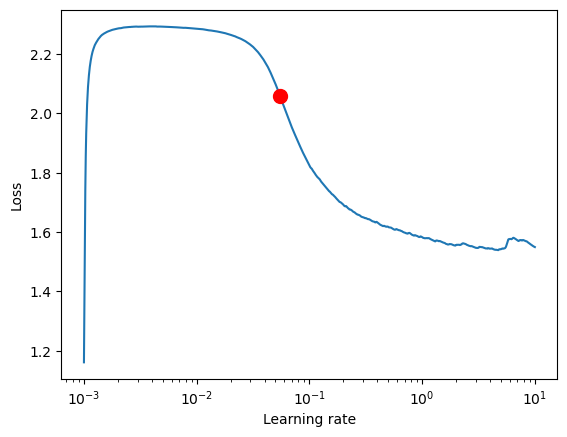

In [15]:
fig = res.plot(suggest=True)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.9120108393559097
Restoring states from the checkpoint path at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_19c4069c-f7e7-4582-a8b8-99660cc3c24b.ckpt
Restored all states from the checkpoint at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_19c4069c-f7e7-4582-a8b8-99660cc3c24b.ckpt


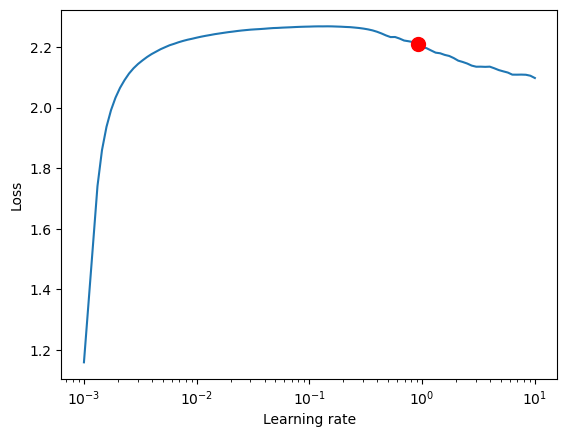

In [16]:
res = tuner.lr_find(model, data, min_lr=1e-3, max_lr=10, num_training=100)
fig = res.plot(suggest=True)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/2000 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=2000` reached.
Learning rate set to 0.028575905433749466
Restoring states from the checkpoint path at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_551f7257-d35b-4bb5-b75e-8b07debc6651.ckpt
Restored all states from the checkpoint at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_551f7257-d35b-4bb5-b75e-8b07debc6651.ckpt


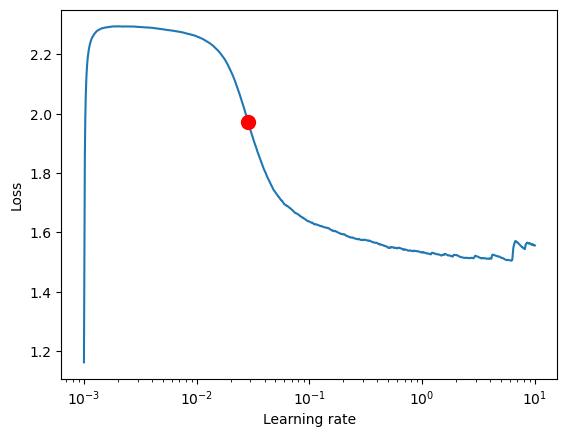

In [17]:
res = tuner.lr_find(model, data, min_lr=1e-3, max_lr=10, num_training=2000)
fig = res.plot(suggest=True)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/5000 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=5000` reached.
Learning rate set to 0.011045871839886296
Restoring states from the checkpoint path at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_2c214cf2-598d-4003-afe8-8a7674e12668.ckpt
Restored all states from the checkpoint at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_2c214cf2-598d-4003-afe8-8a7674e12668.ckpt


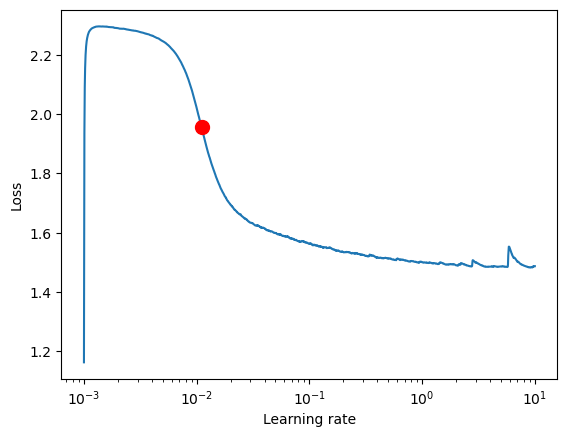

In [18]:
res = tuner.lr_find(model, data, min_lr=1e-3, max_lr=10, num_training=5000)
fig = res.plot(suggest=True)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/5000 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=5000` reached.
Learning rate set to 0.019337485452952573
Restoring states from the checkpoint path at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_e67bde07-8e4d-4e94-9b9b-5c62ea3f168d.ckpt
Restored all states from the checkpoint at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_e67bde07-8e4d-4e94-9b9b-5c62ea3f168d.ckpt


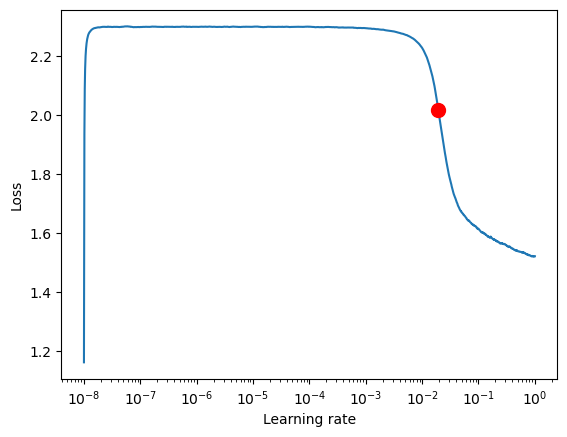

In [19]:
res = tuner.lr_find(model, data, num_training=5000)
fig = res.plot(suggest=True)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/5000 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=5000` reached.
Learning rate set to 0.008441118555927687
Restoring states from the checkpoint path at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_25912d4c-2e0f-4090-9196-6aa0b3c179cb.ckpt
Restored all states from the checkpoint at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_25912d4c-2e0f-4090-9196-6aa0b3c179cb.ckpt


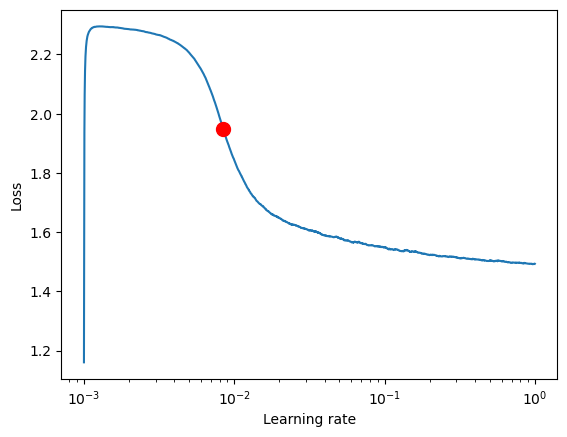

In [20]:
res = tuner.lr_find(model, data, min_lr=1e-3, max_lr=1, num_training=5000)
fig = res.plot(suggest=True)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/5000 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=5000` reached.
Learning rate set to 0.014481048230513728
Restoring states from the checkpoint path at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_a5a59053-1a73-4619-95e9-1990a8a51f5d.ckpt
Restored all states from the checkpoint at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_a5a59053-1a73-4619-95e9-1990a8a51f5d.ckpt


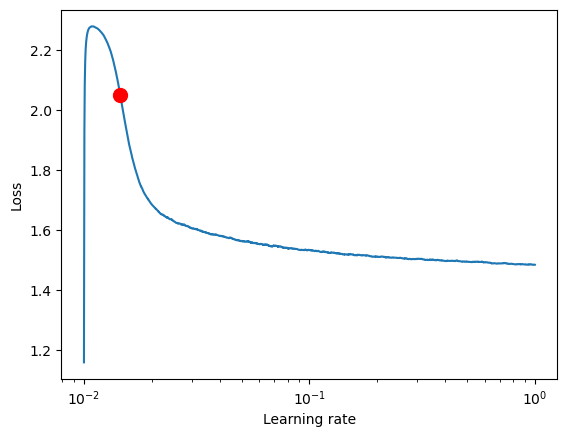

In [21]:
res = tuner.lr_find(model, data, min_lr=1e-2, max_lr=1, num_training=5000)
fig = res.plot(suggest=True)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/5000 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=5000` reached.
Learning rate set to 0.005981360797812743
Restoring states from the checkpoint path at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_0e552032-b4c3-499b-8a62-2b2fcd92b342.ckpt
Restored all states from the checkpoint at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_0e552032-b4c3-499b-8a62-2b2fcd92b342.ckpt


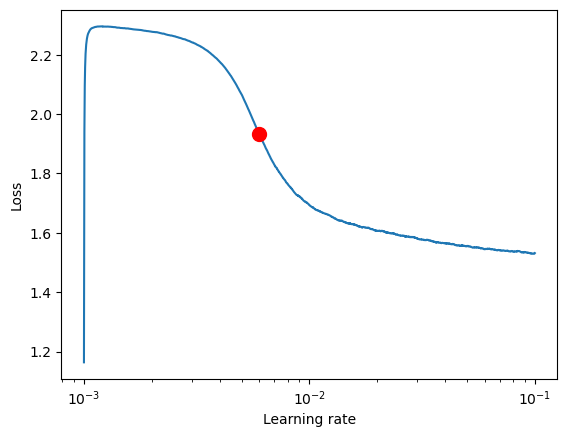

In [22]:
res = tuner.lr_find(model, data, min_lr=1e-3, max_lr=1e-1, num_training=5000)
fig = res.plot(suggest=True)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/1000 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Learning rate set to 0.03162277660168379
Restoring states from the checkpoint path at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_3eb486aa-6a7b-441f-a48d-b868bcb493c6.ckpt
Restored all states from the checkpoint at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_3eb486aa-6a7b-441f-a48d-b868bcb493c6.ckpt


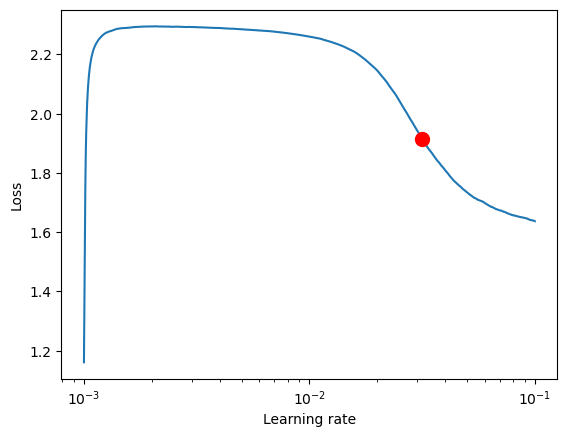

In [23]:
res = tuner.lr_find(model, data, min_lr=1e-3, max_lr=1e-1, num_training=1000)
fig = res.plot(suggest=True)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/1000 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Learning rate set to 0.032779
Restoring states from the checkpoint path at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_2f04c0e1-408a-4b54-ae45-b2d28e9d385f.ckpt
Restored all states from the checkpoint at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_2f04c0e1-408a-4b54-ae45-b2d28e9d385f.ckpt


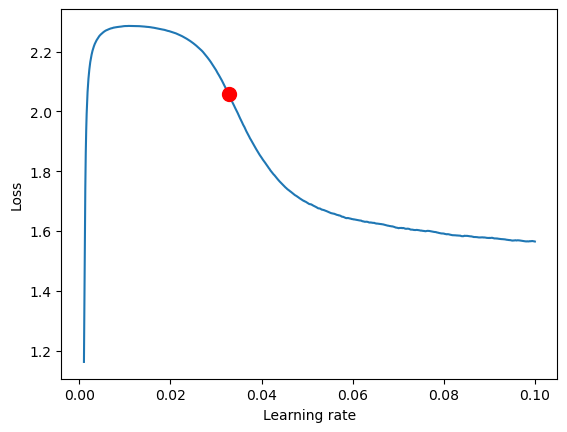

In [27]:
res = tuner.lr_find(model, data, min_lr=1e-3, max_lr=1e-1, num_training=1000, mode='linear')
fig = res.plot(suggest=True)

In [12]:
from mnist_lenet import MNISTDataModel, LeNet5Model

In [5]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2),
    nn.Conv2d(6, 16, kernel_size=5),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2),
    nn.Conv2d(16, 120, kernel_size=5),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Linear(84, 10),
    nn.Sigmoid(),
)

In [13]:
data = MNISTDataModel()
model = LeNet5Model(net)
trainer = Trainer(
    max_epochs=100,
    log_every_n_steps=1,
    callbacks=[ck_train_loss, ck_val_loss, ck_val_acc],
)
tuner = Tuner(trainer)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [14]:
model.hparams

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/1000 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Learning rate set to 0.020892961308540396
Restoring states from the checkpoint path at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_d9a41870-d592-4bf2-b97d-871403a341cb.ckpt
Restored all states from the checkpoint at /root/d2l/d2l-zh-pytorch-slides/chapter_convolutional-neural-networks/.lr_find_d9a41870-d592-4bf2-b97d-871403a341cb.ckpt


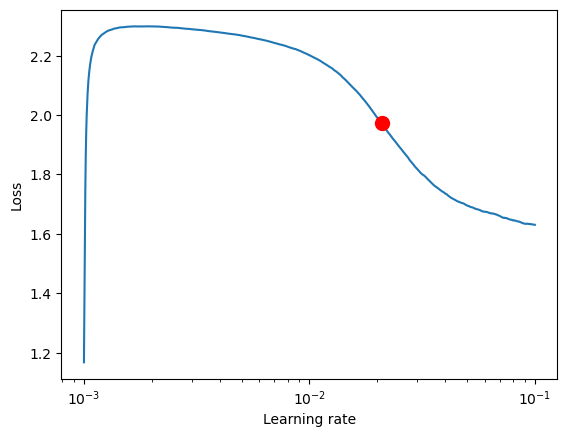

In [9]:
res = tuner.lr_find(model, data, min_lr=1e-3, max_lr=1e-1, num_training=1000)
fig = res.plot(suggest=True)

In [10]:
model.hparams

"epoch":     6
"optimizer": SGD

In [1]:
from mnist_lenet import *

pl.seed_everything(42)

ck_train_loss = ModelCheckpoint(
    monitor="train_loss", filename="model-{epoch:02d}-{train_loss:.2f}"
)
ck_train_acc = ModelCheckpoint(
    monitor="train_acc", mode="max", filename="model-{epoch:02d}-{val_acc:.2f}"
)
ck_val_loss = ModelCheckpoint(monitor="val_loss", filename="model-{epoch:02d}-{val_loss:.2f}")
ck_val_acc = ModelCheckpoint(
    monitor="val_acc", mode="max", filename="model-{epoch:02d}-{val_acc:.2f}"
)

data = MNISTDataModel()

trainer = pl.Trainer(
    max_epochs=100,
    callbacks=[ck_train_loss, ck_train_acc, ck_val_loss, ck_val_acc],
)

Seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [ ]:
model = LeNet5Model(activation="Sigmoid")
trainer.fit(model, data)

In [ ]:
trainer = pl.Trainer(max_epochs=100, callbacks=[ck_train_loss, ck_train_acc, ck_val_loss, ck_val_acc]);
model = LeNet5Model(activation="ReLU");
trainer.fit(model, data)

# 测试

测试矩阵
- max_epoch: 100
- lr: 0.05, 0.5, 5
- optimizer: SGD, Adam
- activation: Tanh, Sigmoid, ReLU, LeakyReLU
- pool: avg, max
- weight_decay: 0, 1e-5, 1e-4, 1e-3

结果：

- lr=5 + SGD：全军覆没，准确率保持在0.1附近
  + ReLU/LeakyReLU，损失函数直接NaN，梯度爆炸
  + Tanh/Sigmoid，损失函数几乎水平，梯度消失

- lr=0.5 + Adam：全军覆没
  + Tanh/Sigmoid，梯度爆炸，损失函数剧烈波动，准确率 0.1 波动
  + ReLU，梯度爆炸，损失函数大部分时间几乎水平，少数时间向上波动，准确率 0.1 波动
  + LeakyReLU，梯度爆炸，损失函数波动剧烈，$10^3$ ~ $10^7$ 之间来回波动（正常 $10^{-4} \sim 10^{-2}$ 左右），准确率剧烈波动

- lr=0.5 + SGD：
  + Tanh： max + wd $\ge 10^{-3}$，开始正常，之后准确率突然跳到 0.1；其他情况正常
  + Sigmoid：正常
  + ReLU：梯度消失，准确率 0.1，有部分是开始正常，之后突然跳到 0.1
  + LeakyReLU：只有 avg + wd=0 正常，其它的都是中间准确率跳到 0.1

- lr=0.05 + Adam：
  + Tanh：只有 avg + wd=0.001 准确率开始为0.1，之后在0.1~0.9之间波动；其它情况梯度大部分时间消失，少数情况会后波动
  + Sigmoid：只有 avg + wd=0.001 准确率开始为0.1，之后在0.9左右波动，偶尔会有大幅下降；其他情况梯度消失
  + ReLU：或直接梯度消失，或准确率开始为0.9，之后突然跳到 0.1，梯度消失
  + LeakyReLU：梯度爆炸，损失函数剧烈波动，准确率也剧烈波动

- lr=0.05 + SGD：最终全部收敛
  + Tanh：正常
  + Sigmoid：损失函数开始不动，一段时间之后开始正常收敛
  + ReLU：正常，波动比 Tanh 大
  + LeakyReLU：正常，波动笔 Tanh 大，比 ReLU 小

测试结果最好的组合：

1. ReLU + MaxPool + Wd=1e-3：训练平均 98.302%，验证平均 97.998%，测试99.030%（最高）
2. LeakyReLU+ MaxPool + Wd=1e-3：训练平均 98.303%，验证平均 97.950%，测试99.010%
3. Tanh + AvgPool + Wd=0：训练平均 97.734%，验证平均 97.646%，测试98.990%
   - Tanh + AvgPool + Wd=1e-3/1e-4：测试98.990%
4. ReLU + MaxPool + Wd=1e-4：测试98.437%，验证平均97.954%，测试98.960%
5. LeakyReLU+ MaxPool + Wd=1e-4：训练平均 98.588%（最高），验证平均 98.095%（最高），测试98.890%

激活函数的规律：

1. ReLU 和 LeakyReLU 和 MaxPool 搭配效果更好
2. Tanh 和 AvgPool 搭配效果更好
3. Sigmoid 函数的效果最差

权重衰减的规律：

1. Tanh 和 Sigmoid 的 wd 值要设的小一些（例如 <=1e-4），设为 0 也可以
2. ReLU 和 LeakyReLU 的 wd 值要设的大一些（例如 >=1e-3），否则会导致过拟合

# 结果

1. SGD + Tanh + AvgPool + Wd=0，max_epoch=1000，测试99.00%（epoch=189，val_loss=0.04）

大约在200轮训练之后开始过拟合，500轮训练之后完全过拟合（`train_acc==1`）

2. SGD + ReLU + MaxPool + Wd=1e-3，max_epoch=1000，测试 98.81%（epoch=995，val_loss=0.04）

两个程序的运行速度基本一致，第一个稍快

3. Adam + ReLU + MaxPool + Wd=1e-4，batch_size=512，max_epoch=200，测试 99.15%（epoch=141，val_loss=0.04）

3. Adam + LeakyReLU + MaxPool + Wd=1e-4，batch_size=512，max_epoch=200，测试 99.13%（epoch=100，val_loss=0.04）